# load data

In [3]:
import numpy as np
import h5py

In [4]:
import matplotlib.pyplot as plt

In [46]:
sub_file = []
for i in range(10):
    sub_file.append(h5py.File('/home/cossim/CosmicGrowth/6610/subcat2/SubSnap_00%s.hdf5'%(i),'r'))
for i in range(10,100):
    sub_file.append(h5py.File('/home/cossim/CosmicGrowth/6610/subcat2/SubSnap_0%s.hdf5'%(i),'r'))

In [20]:
redshift = np.loadtxt('/home/yunzheng/mock/orphan/redshift.txt')

In [215]:
redshift[98]

0.02860234256155403

In [47]:
sub_file[92]['Subhalos'][123104252]['LastMaxVmaxPhysical']

32.20511

In [174]:
sub_file[92]['Subhalos'][2].dtype

dtype([('TrackId', '<i8'), ('Nbound', '<i8'), ('Mbound', '<f4'), ('HostHaloId', '<i8'), ('Rank', '<i8'), ('Depth', '<i4'), ('LastMaxMass', '<f4'), ('SnapshotIndexOfLastMaxMass', '<i4'), ('SnapshotIndexOfLastIsolation', '<i4'), ('SnapshotIndexOfBirth', '<i4'), ('SnapshotIndexOfDeath', '<i4'), ('SnapshotIndexOfSink', '<i4'), ('RmaxComoving', '<f4'), ('VmaxPhysical', '<f4'), ('LastMaxVmaxPhysical', '<f4'), ('SnapshotIndexOfLastMaxVmax', '<i4'), ('R2SigmaComoving', '<f4'), ('RHalfComoving', '<f4'), ('BoundR200CritComoving', '<f4'), ('BoundM200Crit', '<f4'), ('SpecificSelfPotentialEnergy', '<f4'), ('SpecificSelfKineticEnergy', '<f4'), ('SpecificAngularMomentum', '<f4', (3,)), ('InertialTensor', '<f4', (6,)), ('InertialTensorWeighted', '<f4', (6,)), ('ComovingAveragePosition', '<f4', (3,)), ('PhysicalAverageVelocity', '<f4', (3,)), ('ComovingMostBoundPosition', '<f4', (3,)), ('PhysicalMostBoundVelocity', '<f4', (3,)), ('MostBoundParticleId', '<i8'), ('SinkTrackId', '<i8')])

In [16]:
for i in range(23,35):
    print(sub_file[i]['Subhalos'][2362836]['VmaxPhysical'])

89.09249
79.321686
91.94895
83.69414
86.259575
74.242645
73.1961
96.93289
80.512924
85.27573
82.44897
0.0


In [18]:
96.93289 * 0.75

72.6996675

In [4]:
subhalo = np.loadtxt('/home/yunzheng/mock/subhalos_new/subhalotable/snapshot_%s.txt'%92)

KeyboardInterrupt: 

In [ ]:
len(subhalo)

In [19]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snapshot_92_new.npy')

In [13]:
orphanid = table[23086613:26241654,0]

In [14]:
orphanid

array([1.56404000e+05, 6.76482000e+05, 1.20828200e+06, ...,
       1.23021443e+08, 1.23110015e+08, 1.23452839e+08])

In [20]:
ztest = [1,1,1,1,1,1,1,1,1]

In [25]:
b = np.column_stack((table[:9],ztest))

In [27]:
b.shape

(9, 12)

In [75]:
vmax = []
for i in range(100):
    v = np.load('/home/yunzheng/mock/color/data/vmax/snapshot_%s.npy'%i)
    vmax.append(v)

MemoryError: Unable to allocate 841. MiB for an array with shape (110166456,) and data type float64

In [129]:
len(vmax)

41

# zform collection

In [124]:
z_form = []
for i in range(20):
    id_sub = int(table[i][0])
    vpeak = table[i][1]
    vform = vpeak * 0.75
    vsnap = int(table[i][2])
    vbirth = int(table[i][3])
    print('The subhalo id is %s'%(id_sub))
    print('The vpeak is %s'%(table[i][1]))
    print('The vform is %s'%(vform))
#     print('The vpeak snapshot is %s'%(vsnap))
    
    if vsnap == vbirth:
        print('The snapshot of vpeak equals to the birthsnap :%s'%vbirth)
        z_form.append(redshift[vsnap])
    else:
        print('The snapshot of vpeak is %s'%vsnap)
        print('The snapshot of birth is %s'%vbirth)
        
        for k in range(vbirth,vsnap):
            if vmax[k][id_sub][1] <= vform < vmax[k+1][id_sub][1]:
                
                print('The snapshot of interpretation is between %s and %s .'%(k,k+1))
                print('The first redshift is %s'%(redshift[k]))
                print('The next redshift is %s'%(redshift[k+1]))
                print('The first vmax is %s'%(vmax[k][id_sub][1]))
                print('The next vmax is %s'%(vmax[k+1][id_sub][1]))
                
                interp_v = [vmax[k][id_sub][1],vmax[k+1][id_sub][1]]
                interp_z = [redshift[k],redshift[k+1]]
                red_new = np.interp(vform,interp_v,interp_z)
                print('The interplated redshift is %s'%red_new)
#                 z_form.append(red_new)
                print('The snapshot number is %d'%k)
                break
                
            else:
                print("This subhalo couldn't interpolate")
                red_new = redshift[vbirth]
#                 z_form.append(redshift[vbirth])
                print('The snapshot number is %d'%k)
    
    
        print('The snapshot number is %d'%k)
        z_form.append(red_new)
              


The subhalo id is 2
The vpeak is 306.27947998046875
The vform is 229.70960998535156
The snapshot of vpeak is 53
The snapshot of birth is 0
This subhalo couldn't interpolate
The snapshot number is 0
This subhalo couldn't interpolate
The snapshot number is 1
This subhalo couldn't interpolate
The snapshot number is 2
This subhalo couldn't interpolate
The snapshot number is 3
This subhalo couldn't interpolate
The snapshot number is 4
This subhalo couldn't interpolate
The snapshot number is 5
This subhalo couldn't interpolate
The snapshot number is 6
This subhalo couldn't interpolate
The snapshot number is 7
This subhalo couldn't interpolate
The snapshot number is 8
This subhalo couldn't interpolate
The snapshot number is 9
This subhalo couldn't interpolate
The snapshot number is 10
This subhalo couldn't interpolate
The snapshot number is 11
This subhalo couldn't interpolate
The snapshot number is 12
This subhalo couldn't interpolate
The snapshot number is 13
The snapshot of interpretation 

IndexError: list index out of range

In [115]:
len(z_form)

1

In [116]:
z_form

[10.467588034097536]

# $v_{peak} $ bin compararison

In [202]:
table = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_new_with_zform.npy')

In [203]:
subid = table[:,0]
vpeak = table[:,1]
zform = table[:,11]

In [204]:
stag = np.argsort(vpeak)
subid = subid[stag]
vpeak = vpeak[stag]
zform = zform[stag]

In [63]:
subid = np.array(subid,dtype='int')

In [122]:
# subid[0]

In [119]:
# table[-1]

In [120]:
# subid[1]

In [35]:
print(vpeak[])
print(zform[1])

32.205108642578125
0.2890629369941624


In [37]:
vpeak_s = vpeak[:23086613]
vpeak_o = vpeak[23086613:]

In [41]:
zform_s = zform[:23086613]
zform_o = zform[23086613:]

### 对subhalo和orphan分别统计分bin

In [205]:
######对整体
bin_0 = np.arange(30,1841,5)
inds = np.digitize(vpeak,bin_0)
# ######对subhalo
# bin_sub = np.arange(30,1841,5)
# inds_sub = np.digitize(vpeak_s,bin_sub)
# #######对orphan
# bin_o = np.arange(30,796,5)
# inds_o = np.digitize(vpeak_o,bin_o)

In [23]:
print(len(bin_0))
# print(len(bin_sub))
# print(len(bin_o))

363


In [164]:
bin_0[300]

1530

## 分bin存vpeak和相应的zform

In [206]:
zform_sta = [[]for _ in range(363)]
vpeak_sta = [[]for _ in range(363)]
subid_sta = [[]for _ in range(363)]
for n in range(len(vpeak)):
    vpeak_sta[inds[n]].append(vpeak[n])
    zform_sta[inds[n]].append(zform[n])
    subid_sta[inds[n]].append(subid[n])

In [158]:
for i in range(250,300):
    print(len(vpeak_sta[i]))

2
1
5
1
1
2
2
2
2
1
1
2
1
1
2
1
2
3
0
1
0
1
0
0
1
0
2
2
0
1
0
1
1
1
1
1
1
1
0
0
0
2
0
0
1
1
0
2
0
0


In [184]:
# for i in range(8,30):
#     print(sub_file[i]['Subhalos'][4148]['LastMaxVmaxPhysical'])

In [209]:
# 尝试把subhalo信息都存成一行方便查找
vpeak_bin = [[]for _ in range(363)]
for n in range(len(vpeak)):
    sub_info = np.array((int(subid[n]),vpeak[n],zform[n]))
    vpeak_bin[inds[n]].append(sub_info)

In [165]:
aaa = np.array(6)

In [185]:
# v_hist = np.histogram(aaa,bin_red)[0]
# cdf = np.cumsum(v_hist/sum(v_hist))
# plt.plot(bin_red[1:],cdf)

In [42]:
zform_sub = [[]for _ in range(363)]
vpeak_sub = [[]for _ in range(363)]
for n in range(len(vpeak_s)):
    vpeak_sub[inds_sub[n]].append(vpeak_s[n])
    zform_sub[inds_sub[n]].append(zform_s[n])

In [44]:
zform_orp = [[]for _ in range(154)]
vpeak_orp = [[]for _ in range(154)]
for n in range(len(vpeak_o)):
    vpeak_orp[inds_o[n]].append(vpeak_o[n])
    zform_orp[inds_o[n]].append(zform_o[n])

In [95]:
len_vpeak = []
for i in range(363):
    len_vpeak.append(len(vpeak_sta[i]))

In [99]:
len_orphan =[]
for i in range(154):
    len_orphan.append(len(vpeak_orp[i]))

In [71]:
orp_frac = []
sub_frac = []
for i in range(1,154):
    orp_frac.append(len(vpeak_orp[i])/len(vpeak_sta[i]))
    sub_frac.append(len(vpeak_sub[i])/len(vpeak_sta[i]))

In [112]:
vpeak_orp[5]

[54.713619232177734,
 53.92045211791992,
 54.80073165893555,
 52.96757125854492,
 51.884273529052734,
 54.713619232177734,
 54.70756912231445,
 53.92045211791992,
 53.160804748535156,
 53.83265686035156,
 54.631431579589844,
 51.657135009765625,
 54.373291015625,
 53.90187454223633,
 54.59855651855469,
 54.56669998168945,
 54.43025588989258,
 51.42316818237305,
 54.26779556274414,
 54.89561462402344,
 50.27521514892578,
 54.713619232177734,
 54.37729263305664,
 50.91527557373047,
 54.71036911010742,
 54.093135833740234,
 51.85139465332031,
 54.713619232177734,
 53.160804748535156,
 54.913108825683594,
 51.657135009765625,
 51.657135009765625,
 54.52949905395508,
 50.187103271484375,
 51.902671813964844,
 52.554725646972656,
 54.628379821777344,
 50.22985076904297,
 54.446128845214844,
 53.92045211791992,
 54.652225494384766,
 51.657135009765625,
 52.658878326416016,
 51.657135009765625,
 54.372737884521484,
 52.51715087890625,
 53.275516510009766,
 54.13755798339844,
 53.88905334472656

(28.0, 800.0)

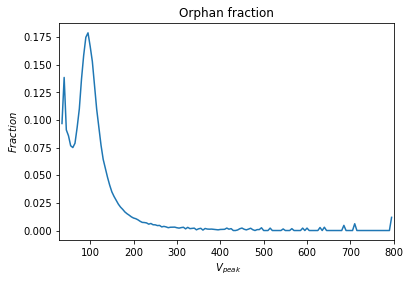

In [92]:
plt.plot(bin_o[1:],orp_frac)
plt.title('Orphan fraction')
plt.xlabel(r' $V_{peak}$ ')
plt.ylabel(r'$Fraction$')
plt.xlim(28,800)
# plt.plot(bin_o[1:],sub_frac,label= 'subhalo fraction')

## 对红移分bin计算 zform cdf

### 对total suhbhalo

In [169]:
arr_red = np.arange(201)
bin_red = 0 + 10 * arr_red / 200

In [93]:
bin_red.shape

(201,)

### 用np.histgram计算cdf

In [207]:
vpeak_sta[1]

[31.40896987915039,
 32.205108642578125,
 32.28962707519531,
 32.323970794677734,
 32.55146408081055,
 32.83756637573242,
 33.162353515625,
 33.36574935913086,
 33.374366760253906,
 33.4238166809082,
 33.42707443237305,
 33.60605239868164,
 33.63984298706055,
 33.70759963989258,
 34.056636810302734,
 34.08015823364258,
 34.168373107910156,
 34.185062408447266,
 34.220645904541016,
 34.367923736572266,
 34.38455581665039,
 34.405303955078125,
 34.4516487121582,
 34.45857620239258,
 34.579410552978516,
 34.6014289855957,
 34.70458984375,
 34.7125129699707,
 34.836734771728516,
 34.86333084106445,
 34.91875076293945]

In [212]:
v_5 = np.histogram(zform_sta[5],bin_red)
v_25 = np.histogram(zform_sta[25],bin_red)
cdf_5 = np.cumsum(v_5[0]/sum(v_5[0]))
cdf_25 = np.cumsum(v_25[0]/sum(v_25[0]))

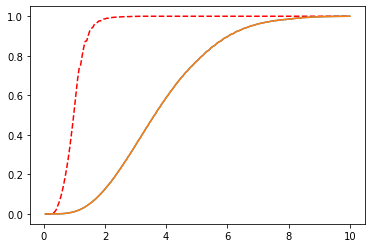

In [213]:
plt.plot(bin_red[1:],cdf_5,'r--')
plt.plot(v_25[1][1:],cdf_25)
plt.plot(bin_red[1:],cdf_25)

5
10
15
20
25


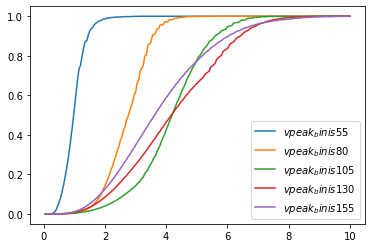

In [210]:
for i in range(5,30,5):
# for i in range(len(vpeak_bin):
    print(i)
    info = np.array(vpeak_bin[i])
    v_hist = np.histogram(info[:,2],bin_red)[0]
    cdf = np.cumsum(v_hist/sum(v_hist))
    plt.plot(bin_red[1:],cdf,label = '$vpeak_bin is%s$'%bin_0[i])
plt.legend()

### 用plt.hist统计cdf

Text(0, 0.5, '$cdf$')

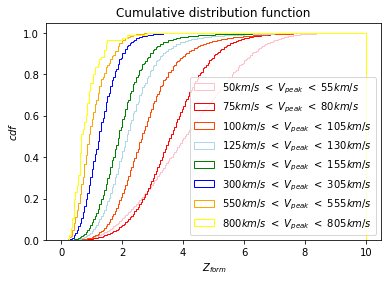

In [97]:
# a = plt.hist(zform_sta[1],bin_red,density = True,cumulative = True,histtype = 'step',color = 'r')
v_5 = plt.hist(zform_sta[5],bin_red,density = True,cumulative = True,histtype = 'step',color = 'pink',label = '$50 km /s \ < \ V_{peak}\ < \ 55 km/s$')
v_10 = plt.hist(zform_sta[10],bin_red,density = True,cumulative = True,histtype = 'step',color = 'red',label = '$75 km /s \ < \ V_{peak}\ < \ 80 km/s$')
v_15 = plt.hist(zform_sta[15],bin_red,density = True,cumulative = True,histtype = 'step',color = 'orangered',label = '$100 km /s \ < \ V_{peak}\ < \ 105 km/s$')
v_20 = plt.hist(zform_sta[20],bin_red,density = True,cumulative = True,histtype = 'step',color = 'lightblue',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$')
v_25 = plt.hist(zform_sta[25],bin_red,density = True,cumulative = True,histtype = 'step',color = 'green',label = '$150 km /s \ < \ V_{peak}\ < \ 155 km/s$')
v_55 = plt.hist(zform_sta[55],bin_red,density = True,cumulative = True,histtype = 'step',color = 'blue',label = '$300 km /s \ < \ V_{peak}\ < \ 305 km/s$')
v_105 = plt.hist(zform_sta[105],bin_red,density = True,cumulative = True,histtype = 'step',color = 'orange',label = '$550 km /s \ < \ V_{peak}\ < \ 555 km/s$')
v_155 = plt.hist(zform_sta[155],bin_red,density = True,cumulative = True,histtype = 'step',color = 'yellow',label = '$800 km /s \ < \ V_{peak}\ < \ 805 km/s$')



plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
# plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak.pdf',dpi = 100)

In [ ]:
v_25[0][]

Text(0, 0.5, '$cdf$')

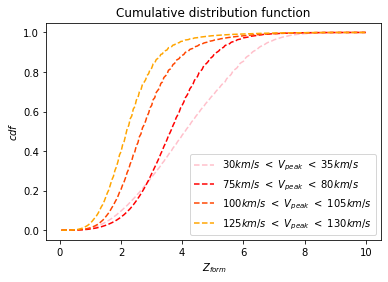

In [98]:
plt.plot(v_5[1][1:],v_5[0],color = 'pink',linestyle = '--',label = '$30 km /s \ < \ V_{peak}\ < \ 35 km/s$')
plt.plot(v_10[1][1:],v_10[0],color = 'red',linestyle = '--',label = '$75 km /s \ < \ V_{peak}\ < \ 80 km/s$')
plt.plot(v_15[1][1:],v_15[0],color = 'orangered',label = '$100 km /s \ < \ V_{peak}\ < \ 105 km/s$',linestyle = '--')
plt.plot(v_20[1][1:],v_20[0],color = 'orange',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$',linestyle = '--')
plt.legend()
plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
# plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak_1.pdf',dpi = 100)

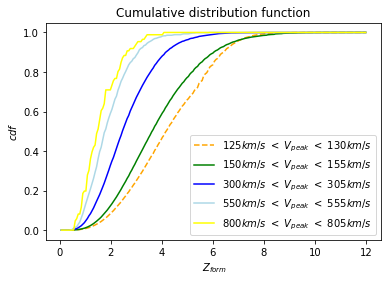

In [188]:
plt.plot(v_20[1][1:],v_20[0],color = 'orange',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$',linestyle = '--')


plt.plot(v_25[1][1:],v_25[0],color = 'green',label = '$150 km /s \ < \ V_{peak}\ < \ 155 km/s$')
plt.plot(v_55[1][1:],v_55[0],color = 'blue',label = '$300 km /s \ < \ V_{peak}\ < \ 305 km/s$')
plt.plot(v_105[1][1:],v_105[0],color = 'lightblue',label = '$550 km /s \ < \ V_{peak}\ < \ 555 km/s$')
plt.plot(v_155[1][1:],v_155[0],color = 'yellow',label = '$800 km /s \ < \ V_{peak}\ < \ 805 km/s$')
plt.legend()
plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak_2.pdf',dpi = 100)

### 对subhalo

In [2]:
arr_red = np.arange(201)
bin_red = 0 + 12 * arr_red / 200

NameError: name 'np' is not defined

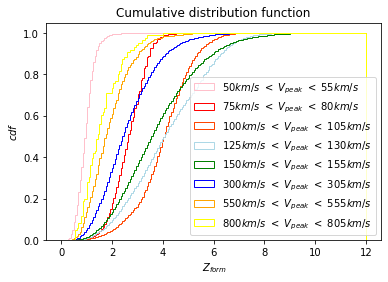

In [114]:
# a = plt.hist(zform_sta[1],bin_red,density = True,cumulative = True,histtype = 'step',color = 'r')
v_5_sub = plt.hist(zform_sub[5],bin_red,density = True,cumulative = True,histtype = 'step',color = 'pink',label = '$50 km /s \ < \ V_{peak}\ < \ 55 km/s$')
v_10_sub = plt.hist(zform_sub[10],bin_red,density = True,cumulative = True,histtype = 'step',color = 'red',label = '$75 km /s \ < \ V_{peak}\ < \ 80 km/s$')
v_15_sub = plt.hist(zform_sub[15],bin_red,density = True,cumulative = True,histtype = 'step',color = 'orangered',label = '$100 km /s \ < \ V_{peak}\ < \ 105 km/s$')
v_20_sub = plt.hist(zform_sub[20],bin_red,density = True,cumulative = True,histtype = 'step',color = 'lightblue',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$')
v_25_sub = plt.hist(zform_sub[25],bin_red,density = True,cumulative = True,histtype = 'step',color = 'green',label = '$150 km /s \ < \ V_{peak}\ < \ 155 km/s$')
v_55_sub = plt.hist(zform_sub[55],bin_red,density = True,cumulative = True,histtype = 'step',color = 'blue',label = '$300 km /s \ < \ V_{peak}\ < \ 305 km/s$')
v_105_sub = plt.hist(zform_sub[105],bin_red,density = True,cumulative = True,histtype = 'step',color = 'orange',label = '$550 km /s \ < \ V_{peak}\ < \ 555 km/s$')
v_155_sub = plt.hist(zform_sub[155],bin_red,density = True,cumulative = True,histtype = 'step',color = 'yellow',label = '$800 km /s \ < \ V_{peak}\ < \ 805 km/s$')



plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak_subhalo.pdf',dpi = 100)

Text(0, 0.5, '$cdf$')

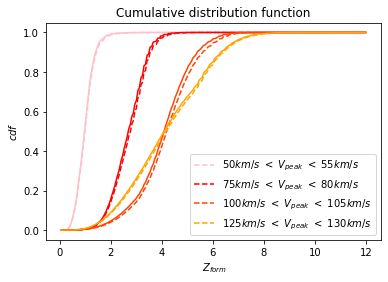

In [115]:
plt.plot(v_5[1][1:],v_5[0],color = 'pink',linestyle = '--',label = '$50 km /s \ < \ V_{peak}\ < \ 55 km/s$')
plt.plot(v_10[1][1:],v_10[0],color = 'red',linestyle = '--',label = '$75 km /s \ < \ V_{peak}\ < \ 80 km/s$')
plt.plot(v_15[1][1:],v_15[0],color = 'orangered',label = '$100 km /s \ < \ V_{peak}\ < \ 105 km/s$',linestyle = '--')
plt.plot(v_20[1][1:],v_20[0],color = 'orange',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$',linestyle = '--')

plt.plot(v_5_sub[1][1:],v_5_sub[0],color = 'pink')
plt.plot(v_10_sub[1][1:],v_10_sub[0],color = 'red')
plt.plot(v_15_sub[1][1:],v_15_sub[0],color = 'orangered')
plt.plot(v_20_sub[1][1:],v_20_sub[0],color = 'orange')
plt.legend()
plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
# plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak_1.pdf',dpi = 100)

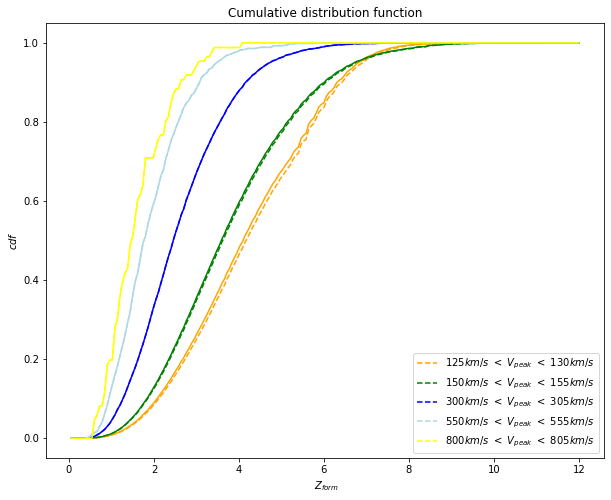

In [93]:
plt.figure(figsize=(10,8))
plt.plot(v_20[1][1:],v_20[0],color = 'orange',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$',linestyle = '--')
plt.plot(v_25[1][1:],v_25[0],color = 'green',label = '$150 km /s \ < \ V_{peak}\ < \ 155 km/s$',linestyle = '--')
plt.plot(v_55[1][1:],v_55[0],color = 'blue',label = '$300 km /s \ < \ V_{peak}\ < \ 305 km/s$',linestyle = '--')
plt.plot(v_105[1][1:],v_105[0],color = 'lightblue',label = '$550 km /s \ < \ V_{peak}\ < \ 555 km/s$',linestyle = '--')
plt.plot(v_155[1][1:],v_155[0],color = 'yellow',label = '$800 km /s \ < \ V_{peak}\ < \ 805 km/s$',linestyle = '--')

plt.plot(v_20_sub[1][1:],v_20_sub[0],color = 'orange')
plt.plot(v_25_sub[1][1:],v_25_sub[0],color = 'green')
plt.plot(v_55_sub[1][1:],v_55_sub[0],color = 'blue')#label = '$300 km /s \ < \ V_{peak}\ < \ 305 km/s$')
plt.plot(v_105_sub[1][1:],v_105_sub[0],color = 'lightblue')#label = '$550 km /s \ < \ V_{peak}\ < \ 555 km/s$')
plt.plot(v_155_sub[1][1:],v_155_sub[0],color = 'yellow')#label = '$800 km /s \ < \ V_{peak}\ < \ 805 km/s$')



plt.legend()
plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak_2.pdf',dpi = 100)

### 对orphan

Text(0, 0.5, '$cdf$')

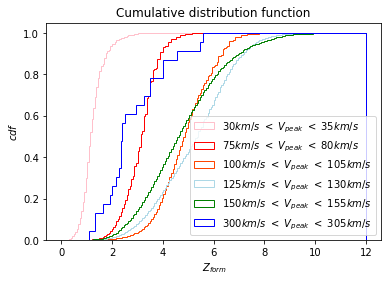

In [80]:
# a = plt.hist(zform_sta[1],bin_red,density = True,cumulative = True,histtype = 'step',color = 'r')
v_5_orp = plt.hist(zform_orp[5],bin_red,density = True,cumulative = True,histtype = 'step',color = 'pink',label = '$30 km /s \ < \ V_{peak}\ < \ 35 km/s$')
v_10_orp = plt.hist(zform_orp[10],bin_red,density = True,cumulative = True,histtype = 'step',color = 'red',label = '$75 km /s \ < \ V_{peak}\ < \ 80 km/s$')
v_15_orp = plt.hist(zform_orp[15],bin_red,density = True,cumulative = True,histtype = 'step',color = 'orangered',label = '$100 km /s \ < \ V_{peak}\ < \ 105 km/s$')
v_20_orp = plt.hist(zform_orp[20],bin_red,density = True,cumulative = True,histtype = 'step',color = 'lightblue',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$')
v_25_orp = plt.hist(zform_orp[25],bin_red,density = True,cumulative = True,histtype = 'step',color = 'green',label = '$150 km /s \ < \ V_{peak}\ < \ 155 km/s$')
v_55_orp = plt.hist(zform_orp[55],bin_red,density = True,cumulative = True,histtype = 'step',color = 'blue',label = '$300 km /s \ < \ V_{peak}\ < \ 305 km/s$')
# v_105_orp = plt.hist(zform_orp[105],bin_red,density = True,cumulative = True,histtype = 'step',color = 'orange',label = '$550 km /s \ < \ V_{peak}\ < \ 555 km/s$')
# v_155_orp = plt.hist(zform_orp[155],bin_red,density = True,cumulative = True,histtype = 'step',color = 'yellow',label = '$800 km /s \ < \ V_{peak}\ < \ 805 km/s$')



plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
# plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak.pdf',dpi = 100)

Text(0, 0.5, '$cdf$')

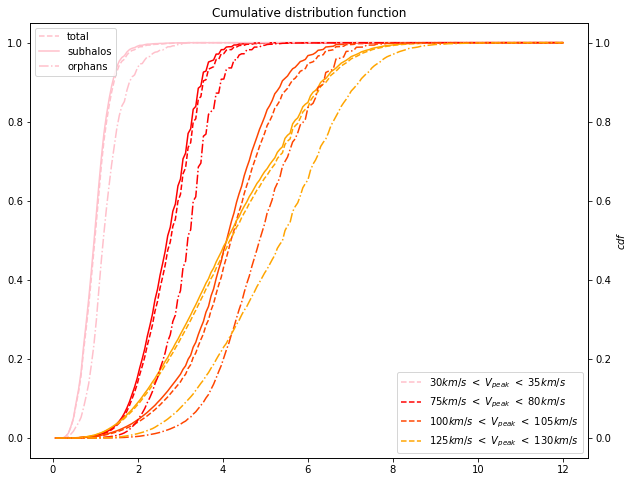

In [91]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.plot(v_5[1][1:],v_5[0],color = 'pink',linestyle = '--',label = '$30 km /s \ < \ V_{peak}\ < \ 35 km/s$')
ax.plot(v_10[1][1:],v_10[0],color = 'red',linestyle = '--',label = '$75 km /s \ < \ V_{peak}\ < \ 80 km/s$')
ax.plot(v_15[1][1:],v_15[0],color = 'orangered',label = '$100 km /s \ < \ V_{peak}\ < \ 105 km/s$',linestyle = '--')
ax.plot(v_20[1][1:],v_20[0],color = 'orange',label = '$125 km /s \ < \ V_{peak}\ < \ 130 km/s$',linestyle = '--')
ax.legend(loc ='lower right')

ax2 = ax.twinx()
ax2.plot(v_5_sub[1][1:],v_5_sub[0],color = 'pink')
ax2.plot(v_10_sub[1][1:],v_10_sub[0],color = 'red')
ax2.plot(v_15_sub[1][1:],v_15_sub[0],color = 'orangered')
ax2.plot(v_20_sub[1][1:],v_20_sub[0],color = 'orange')


ax2.plot(v_5_orp[1][1:],v_5_orp[0],color = 'pink',linestyle = '-.')
ax2.plot(v_10_orp[1][1:],v_10_orp[0],color = 'red',linestyle = '-.')
ax2.plot(v_15_orp[1][1:],v_15_orp[0],color = 'orangered',linestyle = '-.')
ax2.plot(v_20_orp[1][1:],v_20_orp[0],color = 'orange',linestyle = '-.')
ax2.legend(handles=[l1, l2, l3], labels=['total', 'subhalos','orphans'],  loc='upper left')
# plt.legend(loc = 'lower right')
plt.title(r'Cumulative distribution function')
plt.xlabel(r' $Z_{form}$ ')
plt.ylabel(r'$cdf$')
# plt.savefig('/home/yunzheng/mock/color/picture/comparision_vpeak_1.pdf',dpi = 100)

## poor fraction

In [156]:
fraction = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_new_new_zform.npy')
total = fraction[:,1]
poor = fraction[:,0]

In [117]:
fraction_sub = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_subhalo_fracton.npy')
total_sub = fraction_sub[:,1]
poor_sub = fraction_sub[:,0]

In [124]:
fraction_orphan = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_orphan_fracton.npy')
total_orphan = fraction_orphan[:,1]
poor_orphan = fraction_orphan[:,0]

In [125]:
frac_orphan = poor_orphan[1:29] / total_orphan[1:29]

In [118]:
poor_sub

array([0.00000e+00, 2.50000e+01, 3.32000e+02, 3.34400e+03, 1.66820e+04,
       6.03200e+04, 1.58345e+05, 3.06012e+05, 4.92347e+05, 5.19578e+05,
       5.26661e+05, 3.89077e+05, 2.70650e+05, 1.67269e+05, 8.87350e+04,
       5.14410e+04, 2.40500e+04, 1.23220e+04, 6.01700e+03, 2.91500e+03,
       1.35900e+03, 6.44000e+02, 2.15000e+02, 1.09000e+02, 3.10000e+01,
       2.00000e+01, 7.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [122]:
frac_subhalo = poor_sub[1:29] / total_sub[1:29]

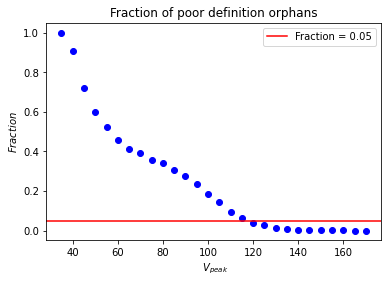

In [127]:
plt.plot(bin_o[1:29],frac_orphan,'bo')
plt.axhline(y=0.05, color='r', linestyle='-',label = 'Fraction = 0.05')
plt.title(r'Fraction of poor definition orphans')
plt.xlabel(r' $V_{peak}$ ')
plt.ylabel(r'$Fraction$')
plt.legend()
# plt.savefig('/home/yunzheng/mock/color/picture/Fraction_vpeak.pdf',dpi = 100)

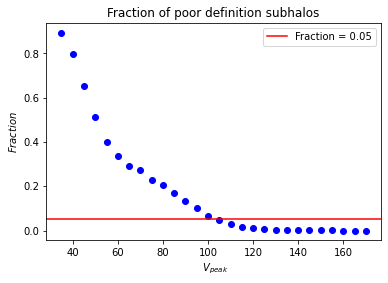

In [126]:
plt.plot(bin_sub[1:29],frac_subhalo,'bo')
plt.axhline(y=0.05, color='r', linestyle='-',label = 'Fraction = 0.05')
plt.title(r'Fraction of poor definition subhalos')
plt.xlabel(r' $V_{peak}$ ')
plt.ylabel(r'$Fraction$')
plt.legend()
# plt.savefig('/home/yunzheng/mock/color/picture/Fraction_vpeak.pdf',dpi = 100)

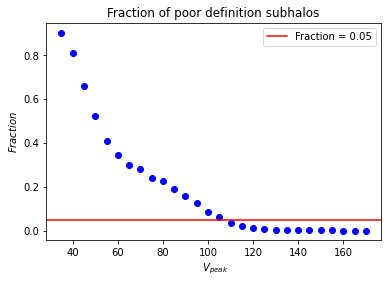

In [195]:
plt.plot(bin_0[1:29],frac,'bo')
plt.axhline(y=0.05, color='r', linestyle='-',label = 'Fraction = 0.05')
plt.title(r'Fraction of poor definition subhalos')
plt.xlabel(r' $V_{peak}$ ')
plt.ylabel(r'$Fraction$')
plt.legend()
plt.savefig('/home/yunzheng/mock/color/picture/Fraction_vpeak.pdf',dpi = 100)

(0.0, 500.0)

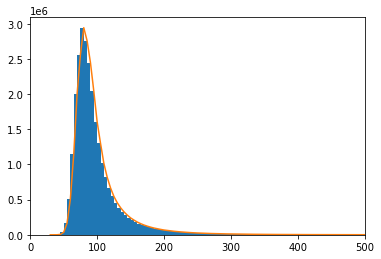

In [97]:
plt.hist(vpeak,bin_0)
plt.plot(bin_0,len_vpeak)
plt.xlim(0,500)

(0.0, 300.0)

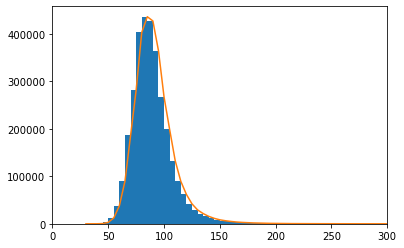

In [101]:
plt.hist(vpeak_o,bin_o)
plt.plot(bin_o,len_orphan)
plt.xlim(0,300)

In [ ]:
plt.hist(vpeak_s,bin_s)

# check new code

In [129]:
subhalonew = np.load('/home/yunzheng/mock/color/data/newcatalogue/snap_92_subhalo_with_zform.npy')

In [132]:
newvpeak = subhalonew[:,1]
newzform = subhalonew[:,-1]

In [134]:
print(max(newvpeak))
print(min(newvpeak))

1835.6221923828125
31.40896987915039


In [135]:
######对subhalo
bin_sub = np.arange(30,1841,5)
inds_sub = np.digitize(newvpeak,bin_sub)

In [ ]:
zform_sub = [[]for _ in range(363)]
vpeak_sub = [[]for _ in range(363)]
for n in range(len(vpeak_s)):
    vpeak_sub[inds_sub[n]].append(newvpeak[n])
    zform_sub[inds_sub[n]].append(newzform[n])